<a href="https://colab.research.google.com/github/pescadicto/ucema/blob/master/revistaucema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Esta aplicación es parte de la respuesta a un ejercicio planteado
# en "Data Science 101" (UCEMA), 2020.
# En el desarrollo de esta aplicación de han privilegiado los aspectos didácticos
# por sobre los de eficiencia de implementación y elegancia del código.
# Se incluyen fragmentos de código que han sido escritos y luego descartados.

In [2]:
# el siguiente código busca revistas en la web de ucema mediante un crawling hardcodeado
# luego de desarrollarlo, encontré, por supuesto, una manera más fácil de hacerlo...

# import requests # interacción http
# from bs4 import BeautifulSoup # Parsing HTML

# index = requests.get(base_url+'/revista-ucema').text
# soup_index = BeautifulSoup(index, 'html.parser')
# url_revistas = [link['href'] for link in soup_index.find_all('a')  if (link.has_attr('href') and link['href'].endswith('pdf'))]
# otras_carpetas = [link['href'] for link in soup_index.find_all('a') if (link.has_attr('href') and link['href'].startswith('/revista-ucema/nro'))]
# url_revistas = list(set(url_revistas))
# for dir in otras_carpetas:
#   otro_ejemplar = [a['href'] for a in BeautifulSoup(requests.get(base_url+dir).text, 'html.parser').find_all('a') if (a.has_attr('href') and a['href'][-3:] == "pdf")]
#   if otro_ejemplar[0] not in url_revistas:
#     url_revistas.append(otro_ejemplar[0])

In [3]:
# reemplazo el código anterior por una búsqueda en google
# (aparentemente google es más eficiente que yo para buscar en la web)

from googlesearch import search

query = 'site:ucema.edu.ar/publicaciones/download/revista_ucema filetype:pdf'
url_de_revistas = [resultado for resultado in  search(query) if (resultado.split('/')[-1])[:len('revista')] == 'revista']

In [4]:
# escribí el siguiente código spara descargar cada una de las revistas de la lista url_revistas
# ... pero ...
# ¿es necesario descargarlas? la respuesta no los sorprenderá

# import urllib   # interacción http
# import requests # interacción http
# import os       # File system management
# pic_dir = './pic/'
# pdf_dir = './pdf/'
# txt_dir = './txt/'
# base_url = 'https://ucema.edu.ar'
# if not os.access(pic_dir, os.F_OK): os.mkdir(pic_dir)
# if not os.access(pdf_dir, os.F_OK): os.mkdir(pdf_dir)
# if not os.access(txt_dir, os.F_OK): os.mkdir(txt_dir)
# for ejemplar in url_revistas: 
#   archivo = pdf_dir + ejemplar.split('/')[-1]
#   if not os.access(archivo, os.F_OK): urllib.request.urlretrieve (base_url + ejemplar, archivo)

In [5]:
# el siguiente código recorre cada página de cada revista buscando imágenes y las descarga
# por supuesto, luego de escribirlo pensé... ¿es necesario descargarlas?
# en fin...
# de cualquier forma, el análisis de las imágenes quedará para otra ocasión

# !pip install pdfreader -q
# from pdfreader import PDFDocument, SimplePDFViewer # API de acceso a PDFs
# import shutil #compresión de archivos

# cantidad = 0
# nombre_revistas = [p.split('/')[-1] for p in list(set(url_revistas))]
# for revista in url_revistas:
#   nombre_revista = revista.split('/')[-1]
#   fd = open(pdf_dir + nombre_revista, "rb")
#   doc = PDFDocument(fd)
#   pagina = 0
#   for p in doc.pages():
#     if p.Resources.XObject and p.Resources.XObject.items():
#       imagen = 0
#       for r in p.Resources.XObject.items():
#         if r[0][0] == 'I' and str(r[1]).split(',data=b')[1][1] == "\\":
#           try:
#             pic = r[1].to_Pillow()
#             path_and_filename = pic_dir + str(nombre_revista)[:-4] + "_" + str(pagina) + "_" + str(imagen) + '.' + str(pic.format)
#             if not os.access(path_and_filename, os.F_OK):
#               pic.save(path_and_filename)
#               imagen += 1
#               cantidad += 1
#           except:
#               print('coso en pagina '+str(pagina)+' imagen '+str(r[0])) #pass #algún bug de Pillow, se omite el archivo
#     pagina += 1

#     shutil.make_archive('backup pics', 'zip', pic_dir)

In [6]:
# adivinen si armé archivos conteniendo el texto de cada revista...

# !pip install pdfminer.six --q

# from pdfminer.high_level import extract_pages
# from pdfminer.layout import LTTextContainer

# for revista in url_revistas:
#   ejemplar = pdf_dir + revista.split('/')[-1]
#   texto = ''
#   for page_layout in extract_pages(ejemplar):
#       for element in page_layout:
#           if isinstance(element, LTTextContainer):
#               texto = texto + element.get_text()
#   with open(ejemplar + 'txt', 'w') as output:
#       output.write(texto)

#lo que sigue es para modificar lo de arriba: parsear los documentos sin bajarlos

In [7]:
# con el siguiente código recorro cada página de cada revista
# extrayendo todo el texto que contienen  (scrapping)

!pip install pdfminer.six --q

from pdfminer.high_level import extract_pages   # para extraer páginas del pdf
from pdfminer.layout import LTTextContainer     # para extraer texto de las páginas
import urllib                                   # interacción http

texto_raw_sp=[]

for ejemplar in url_de_revistas: #[0:4]:
  print('Extrayendo texto de '  + ejemplar.split('/')[-1])
  revista = urllib.request.urlretrieve(ejemplar)
  paginas = extract_pages(revista[0])
  for pagina in paginas:
    for elemento in pagina:
      if isinstance(elemento, LTTextContainer):
        texto_raw_sp.append(elemento.get_text())

     |████████████████████████████████| 5.6MB 2.5MB/s 
     |████████████████████████████████| 2.6MB 35.3MB/s 
Extrayendo texto de revista_ucema9_abr2009.pdf
Extrayendo texto de revista_ucema3_sep2007.pdf
Extrayendo texto de revista_ucema34_sep2017.pdf
Extrayendo texto de revista_ucema33_may2017.pdf
Extrayendo texto de revista_ucema10_ago2009.pdf
Extrayendo texto de revista_ucema29_dec2015.pdf
Extrayendo texto de revista_ucema36_jul2018.pdf
Extrayendo texto de revista_ucema22_ago2013.pdf
Extrayendo texto de revista_ucema30_may2016.pdf
Extrayendo texto de revista_ucema28_sep2015.pdf
Extrayendo texto de revista_ucema11_nov2009.pdf
Extrayendo texto de revista_ucema12_may2010.pdf
Extrayendo texto de revista_ucema17_nov2011.pdf
Extrayendo texto de revista_ucema15_may2011.pdf
Extrayendo texto de revista_ucema14_nov2010.pdf
Extrayendo texto de revista_ucema18_abr2012.pdf
Extrayendo texto de revista_ucema6_jun2008.pdf
Extrayendo texto de revista_ucema21_abr2013.pdf
Extrayendo texto de revista_

In [8]:
# haremos algo de limpieza de los textos obtenidos ("escrapeados")
# el primer paso será el de "juntar" las palabras
# cortadas al final de los renglones (o sea eliminar cada 
# símbolo '-' seguido  de un newline character /n), para esto
# utlizaremos expresiones regulares(en https://regexr.com/ pueden jugar con ellas)

import re   # expresiones regulares

texto_raw_sp =  [re.sub('[\s]{1,}', ' ',  elemento) for elemento in texto_raw_sp] #remuevo múltiples espacios
texto_raw_sp =  [re.sub('[-\n]', '',  elemento) for elemento in texto_raw_sp] #reúno palabras cortadas

# la traducción de texto es time-consuming, y por otra parte el objetivo del trabajo es deducir
# el tema de un párrafo, de un fragmento o de un texto completo. Hemos extraído TODO el texto de las revistas
# así que tenemos muchas palabras sueltas y frases cortas a las que no nos interesará extraerles el tema
# entonces, eliminaremos todos los textos de menos de 150 palabras
# (notar que el 150 en vez de estar hardcodeado bien podría ser un hiperparámetro a ser ajustado
# durante la fase de validación del modelo clasificador)

texto_raw_sp = [fragmento for fragmento in texto_raw_sp if len(fragmento.split())>= 150]

In [9]:
# realizada la limpieza básica, podemos traducir

!pip install googletrans --q
import googletrans              # bendito google

traductor = googletrans.Translator()
texto_raw_en = traductor.translate(texto_raw_sp, src='spanish', dest='english')
texto_raw_en = [traduccion.text for traduccion in texto_raw_en]

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 962kB 8.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 


In [10]:
# ahora convertiremos la lista de fragmentos de texto en un una lista de listas (cada elemento
# de la gran lista será ahora un fragmento de texto expresado como una lista de palabras)
# en la misma operación aplicamos una expresión regular para limpiar símbolos, números y puntuación
# (esta última limpieza no la hice antes para no perder el sentido de las frases al traducir
# ya que a partir de ahora sólo tendremos palabras y no frases, por supuesto también se podría
# traducir una lista de palabras pero las traducciones serían más pobres al perder contexto)

texto_sp_with_stopwords =  [re.sub('[^a-zA-ZáéíóúÁÉÍÓÚüÜ]', ' ',  elemento).split() for elemento in texto_raw_sp]
texto_en_with_stopwords =  [re.sub('[^a-zA-ZáéíóúÁÉÍÓÚüÜ]', ' ',  elemento).split() for elemento in texto_raw_en]         

# la función extract_pages.get_text() devuelve las palabras duplicadas cuando en el pdf los textos 
# tienen cierto formato (adivino que el efecto "sombra" está logrado duplicando el texto...)
# así que limpiaré eso (busco listas en las que todos los elementos se repitan un número
# par de veces y elimino en estos la mitad de los repetidos
# (anulé el código siguiente ya que los textos con palabras duplicadas resultaron 
# eliminados antes cuando descartamos fragmentos de menos de 150 palabras)

# texto_temporal = list()
# for fragmento in texto:
#   dict = {i:fragmento.count(i) for i in fragmento}
#   if sum(cantidad for palabra, cantidad in dict.items() if cantidad%2 == 1) == 0:
#     fragmento = set(fragmento)
#   texto_temporal.append(fragmento)
# texto = texto_temporal

# exploremos un poco los datos que tenemos:

fragmentos_sp = len(texto_sp_with_stopwords)
palabras_sp = sum(len(parrafo) for parrafo in texto_sp_with_stopwords)
letras_sp = sum(len(palabra) for parrafo in texto_sp_with_stopwords for palabra in parrafo)

fragmentos_en = len(texto_en_with_stopwords)
palabras_en = sum(len(parrafo) for parrafo in texto_en_with_stopwords)
letras_en = sum(len(palabra) for parrafo in texto_en_with_stopwords for palabra in parrafo)

print('En español: fragmentos: ', fragmentos_sp, ' palabras: ',palabras_sp, ' letras: ', letras_sp,'. Letras por palabra: ', round(letras_sp/palabras_sp,2))
print('En inglés: fragmentos: ', fragmentos_en, ' palabras: ',palabras_en, ' letras: ', letras_en,'. Letras por palabra: ', round(letras_en/palabras_en,2))

# en esta etapa la relación letras/palabras da cerca de 5, tiene sentido ya que hay muchas palabras cortas (ya que no eliminé las stopwords)

# lo que sigue
# en ambas listas eliminar stop words
# ver wordcloud
# entrenar red (conjunto train en ingles, reservar subcconjunto para test)
# meter parrafos de la lista y ver cómoo son clasificados


En español: fragmentos:  863  palabras:  193500  letras:  946493 . Letras por palabra:  4.89
En inglés: fragmentos:  863  palabras:  187835  letras:  922447 . Letras por palabra:  4.91


In [11]:
#from nltk.corpus import stopwords
#from many_stop_words import get_stop_words

import nltk   # super librerías para simbolic NLP
from nltk.corpus import stopwords
nltk.download('stopwords',quiet=True)

stop_sp= list(stopwords.words('spanish'))
stop_en= list(stopwords.words('english'))

# paso toda a minúsculas, las mayúsculas no aportan nada al análisis
texto_sp_with_stopwords = [[w.lower() for w in fragmento] for fragmento in texto_sp_with_stopwords]
texto_en_with_stopwords = [[w.lower() for w in fragmento] for fragmento in texto_en_with_stopwords]

texto_sp = [[w for w in fragmento if not w in stop_sp] for fragmento in texto_sp_with_stopwords]
texto_enx = [[w for w in fragmento if not w in stop_en] for fragmento in texto_en_with_stopwords]
# elimino tambien de los textos en ingles las stopwords en español que seguro se colaron:
texto_en = [[w for w in fragmento if not w in stop_sp] for fragmento in texto_enx]  

fragmentos_sp = len(texto_sp)
palabras_sp = sum(len(parrafo) for parrafo in texto_sp)
letras_sp = sum(len(palabra) for parrafo in texto_sp for palabra in parrafo)

fragmentos_en = len(texto_en)
palabras_en = sum(len(parrafo) for parrafo in texto_en)
letras_en = sum(len(palabra) for parrafo in texto_en for palabra in parrafo)

print('En español: fragmentos: ', fragmentos_sp, ' palabras: ',palabras_sp, ' letras: ', letras_sp,'. Letras por palabra: ', round(letras_sp/palabras_sp,2))
print('En inglés: fragmentos: ', fragmentos_en, ' palabras: ',palabras_en, ' letras: ', letras_en,'. Letras por palabra: ', round(letras_en/palabras_en,2))

# eliminadas las stopwords la relación letras/palabras da cerca de 7

En español: fragmentos:  863  palabras:  110323  letras:  741964 . Letras por palabra:  6.73
En inglés: fragmentos:  863  palabras:  100990  letras:  686206 . Letras por palabra:  6.79


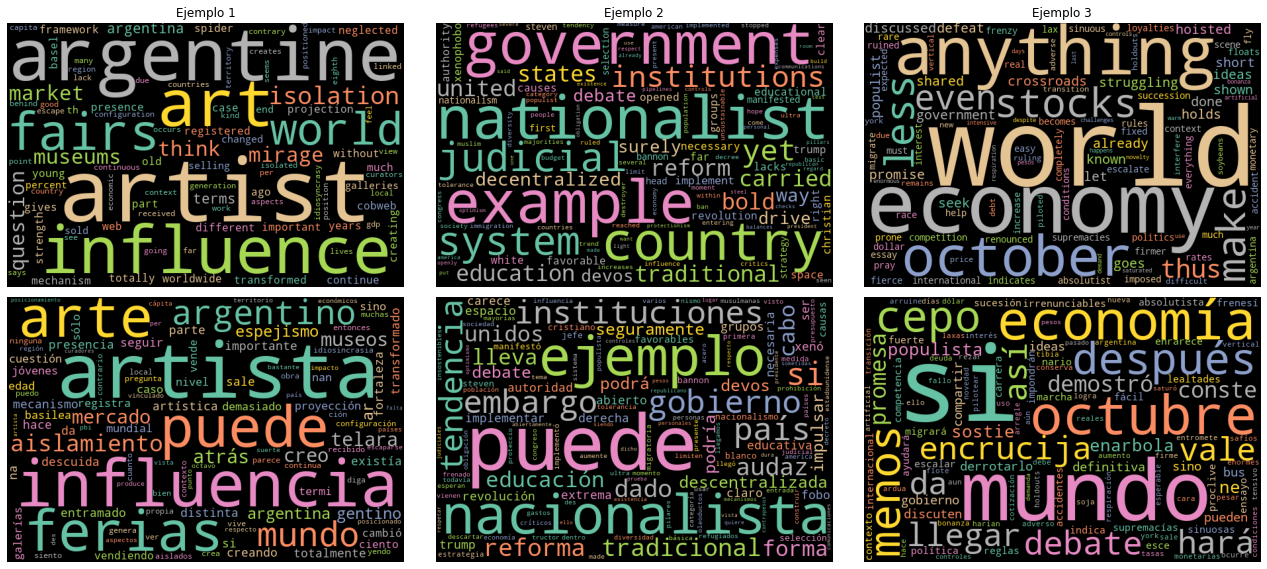

In [62]:
# verificaremos cualitativamente si los pasos anteriores se han ejecutado
# como los pensé, introduciendo una herramienta popular llama wordcloud
# Compararemos las nubes de un mismo texto en inglés y en castellano

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
%matplotlib inline

fig=plt.figure()
fig.set_figheight(8)
fig.set_figwidth(18)
axes=[]

# elegiremos al azar dentro de los subconjuntos de textos más largos
# armo lista de uplas (letras del fragmento, fragmento) y la ordeno por el primer elemento:

texto_en_aux = [(len(''.join(x)), texto_en.index(x)) for x in texto_en] 
texto_en_aux = sorted(texto_en_aux, key=lambda x: x[0])

for x in range(3):

  indice = random.randint(int(len(texto_en_aux)*0.6),int(len(texto_en_aux)*0.85))
 
  wordcloud = WordCloud(width = 600, height = 400, random_state=1, background_color='black', colormap='Set2',collocations=False).generate(' '.join(texto_en[texto_en_aux[indice][1]]))

  axes.append( fig.add_subplot(2, 3, x+1) )
  axes[-1].set_title('Ejemplo '+str(x+1))
  axes[-1].set_axis_off()
  plt.imshow(wordcloud)

  wordcloud = WordCloud(width = 600, height = 400, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(' '.join(texto_sp[texto_en_aux[indice][1]]))

  axes.append( fig.add_subplot(2, 3, x+4))
  axes[-1].set_axis_off()
  plt.imshow(wordcloud)

fig.tight_layout()    
plt.show()

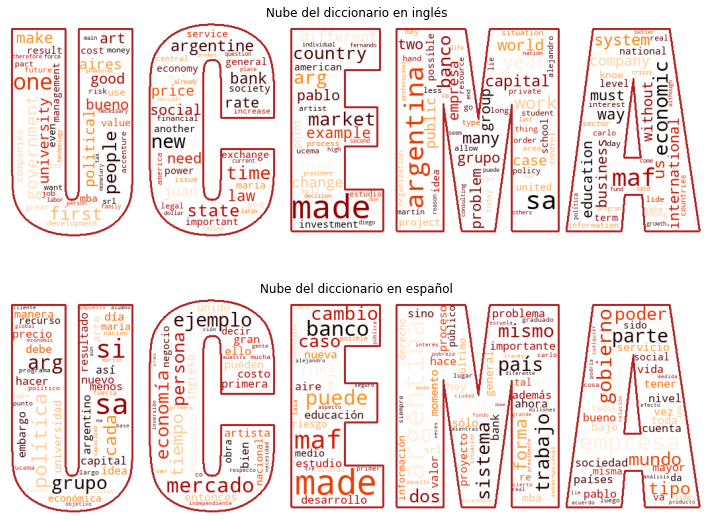

In [52]:
# resulta interesante también ver cómo quedan las nubes de palabras que forman los diccionarios
# armados a partir del conjunto de palabras con y sin stop words
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('./UCEMA.png'))

dict_en = [palabra for parrafo in texto_en for palabra in parrafo]
dict_sp = [palabra for parrafo in texto_sp for palabra in parrafo]


fig=plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
axes=[]

wordcloud = WordCloud(width = 1000, height = 600, random_state=1, background_color='white', colormap='gist_heat', contour_width=2, contour_color='firebrick', collocations=False, mask=mask).generate(' '.join(dict_en))

axes.append( fig.add_subplot(2, 1, 1))
axes[-1].set_title('Nube del diccionario en inglés')
axes[-1].set_axis_off()
plt.imshow(wordcloud)

wordcloud = WordCloud(width = 1000, height = 600, random_state=1, background_color='white', colormap='gist_heat_r', contour_width=2, contour_color='firebrick', collocations=False, mask=mask).generate(' '.join(dict_sp))

axes.append( fig.add_subplot(2, 1, 2))
axes[-1].set_title('Nube del diccionario en español')
axes[-1].set_axis_off()
plt.imshow(wordcloud)

fig.tight_layout()    
plt.show()